# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='' width="700" />

>- Define your mission!
>>We are trying to optimize the tuning of a classification model that predicts the flights that are likely to be delayed

>- Real World Impact!
>>If we can predict flight delays mroe accurately then we can give better time to our customers thus increasing customer retention

>- Key stakeholders!
>>Airline administration

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

In [3]:
# Read in data - see what we're dealing with
df = pd.read_csv('FlightDelays_Clean.csv')
df.tail()

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2196,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,1,0,0,0
2197,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,1,0,0
2198,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,1,0
2199,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,0,1
2200,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,1,0,0,0,0,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** label (1 if flight delayed, 0 otherwise) <br><br>

>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>This is simple for now - may need to add more sampling complexity in future


> **About TARGET variable : "Status_delayed"** <a class="anchor" id="data-split"></a>
<br>

>To Do:<br>
>1. Potential Predictor variables can be any variable that is attributing in predict variable 'task_completed' such as experience level etc.  
>3. Partition data into training set and testing set<br>


> **Train/Test split** <a class="anchor" id="data-split"></a>
<br>

>To Do:<br>
>1. We need to see determine the most accurate split ratio.
>2. Research random_state so that we can generate different accuracy scores.

>Result:<br>
>1. Since dataset is small we are going to go ahead with **60-40** split.
>2. After some thorough research, 1 convincing article(Check Appendix for link) and multiple hit and trial - the random state is **9** .

In [4]:
target = ['status_delayed']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4,random_state=9)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [4]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

In [5]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.74
1,3,0.78
2,5,0.81
3,7,0.82
4,9,0.80
5,11,0.81
6,13,0.82
7,15,0.83
8,17,0.83
9,19,0.83


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 11 as this is the lowest value that achieves the highest accuracy value<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [5]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.8
Testing data Accuracy: 0.82


>**Result for selecting k = 11:**<br>
By the result we can say confidently, we did not overfit or underfit the data since the accuracy for both is exactly sAame.

In [6]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.81
Testing data Accuracy: 0.84


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

/Users/diptibisht/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


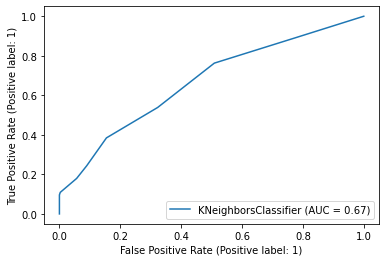

/Users/diptibisht/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


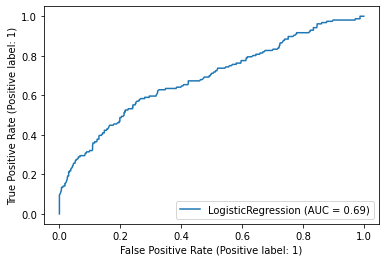

In [8]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our Logistic Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [9]:
class_perf_measures(lr_model,X_test,y_test)

/Users/diptibisht/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,156,0,725,0,0.18,1.00,0.18
1,0.10,137,190,535,19,0.20,0.88,0.37
2,0.20,99,464,261,57,0.28,0.64,0.64
3,0.30,59,631,94,97,0.39,0.38,0.78
4,0.40,30,703,22,126,0.58,0.19,0.83
5,0.50,17,722,3,139,0.85,0.11,0.84
6,0.60,15,725,0,141,1.00,0.10,0.84
7,0.70,15,725,0,141,1.00,0.10,0.84
8,0.80,15,725,0,141,1.00,0.10,0.84
9,0.90,15,725,0,141,1.00,0.10,0.84


>**Now let's dive into performance measures:**
>First we will define all the TP, TN, FP and FN in business terms
> - **TP** : The flight is actually delayed, and the flight was actually delayed.
> - **TN** : The flight was not delayed and the model also predicted that it is not delayed.
> - **FP** : The flight was predicted delayed but was actually not delayed.
> - **FN** : The flight was actually delayed but not predicted as delayed.


>**Business Objective:**
>> Our key stakeholder is airline marketing who aim to predict accurate flight delaying system. 

>> Over here the main focus is to predict flight delayed accurately so that our customers remain retained.

>**Business-driven Data Decision**
>> We are going to select threshold **0.5** for following reasons: 
>>> - As it has the highest accuracy with lowest FN. 
>>> - The costliest mistake we can make is FN therefore we will use Recall.

1. **Prob Threshold = 0.4**:
    - Highest accuracy in the range of 0.1-0.4 but not happy with the number of FN. 
    - It is unbelievably high which I am not sure why, thus I am going to explore other threshold levels. 
<br><br>
2. **Prob Threshold = 0.6**:
    - This is better but difference is not much, thus we can not sure about this threshold but this is the only threshold that has lowest number of FN and high accuracy.
<br><br>
3. **Prob Threshold = 0.8**:
    - This definitely increases precision to 1 but only because we have increased our threshold so high that there's no factor of predictability and thus we do not need an analyst to determine, making our model redundant. 
<br><br>
4. Which threshold would you choose?  Justify your decision.
    - I would definitely choose probability threshold 0.6 because of recall and high accuracy. 

>[Go to Machine Learning Outline](#ml-model)
---

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

Optional - Extra Credit for this assignment

* [Go to Top](#table-of-content)